Quais são os principais determinantes do Índice de Liberdade Humana (HFI)
e como suas diferentes dimensões (pessoal e econômica) se correlacionam
com o desenvolvimento socioeconômico e a estabilidade regional ao longo do tempo?


1 - Determinar os determinantes do HFI

2 - Como suas dimensões (pessoal e econômica) se correlacionam com o desenvolvimento

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/hfi_cc_2022.csv")

df["hf_score"] = pd.to_numeric(df["hf_score"], errors="coerce")

df.dropna(subset=["hf_score", "countries"], inplace=True)

df = df.fillna("Unknown")

df_latest_year = df.sort_values("year", ascending=False).drop_duplicates(subset="countries")

df.head()


,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2020,Albania,Eastern Europe,7.67,47.0,2.0,5.903741,4.725831,4.047825,7.194198,...,5.651538,6.0,9.742477,5.9975,5.62194,7.17525,6.698118,7.112958,7.64,26.0
1,2020,Algeria,Middle East & North Africa,5.13,154.0,4.0,4.913311,5.503872,4.254187,5.461189,...,4.215154,2.222222,9.305002,2.5775,8.771111,7.029528,5.686753,5.778953,5.12,157.0
2,2020,Angola,Sub-Saharan Africa,5.97,122.0,3.0,2.773262,4.352009,3.47895,5.306695,...,2.937894,3.111111,8.730805,4.7025,7.916416,6.782923,5.696942,6.227545,5.91,138.0
3,2020,Argentina,Latin America & the Caribbean,6.99,74.0,2.0,6.824288,5.679943,4.218635,6.748978,...,2.714233,5.555556,9.579288,7.2675,5.726521,6.508295,6.225232,5.490538,4.87,161.0
4,2020,Armenia,Caucasus & Central Asia,8.14,26.0,1.0,Unknown,Unknown,Unknown,7.204175,...,5.170406,5.111111,9.86353,6.26,9.302574,7.040738,7.124727,7.756333,7.84,11.0


In [33]:
# Top 10 higher HFI

top_10_hfi = df_latest_year.sort_values(by='hf_score', ascending=False)
top_10_hfi.head(10)

,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
143,2020,Switzerland,Western Europe,8.94,1.0,1.0,Unknown,Unknown,Unknown,8.533453,...,6.324563,6.222222,9.575023,9.785,8.373754,9.293812,8.262396,8.096077,8.37,3.0
109,2020,New Zealand,Oceania,8.75,2.0,1.0,8.334416,7.832735,7.393616,8.356818,...,5.191193,8.444444,9.981891,9.65,9.39883,8.430694,8.516176,8.569218,8.27,4.0
48,2020,Estonia,Eastern Europe,8.73,3.0,1.0,8.70105,8.024204,7.16285,8.266607,...,5.201454,8.888889,9.834489,9.6525,9.239308,9.439534,8.709362,8.212536,7.95,8.0
42,2020,Denmark,Western Europe,8.72,4.0,1.0,9.55315,8.624073,8.326372,8.295614,...,4.787931,6.222222,9.852401,9.1425,9.874836,8.520369,8.06671,8.425007,8.09,5.0
73,2020,Ireland,Western Europe,8.70,5.0,1.0,8.628855,7.41061,7.248045,8.422915,...,4.895273,6.444444,9.646768,9.2625,8.237088,9.08644,7.928752,8.136412,7.86,10.0
142,2020,Sweden,Western Europe,8.66,6.0,1.0,9.58026,8.311765,7.991734,8.877246,...,4.588801,6.222222,9.7202,9.635,9.007834,8.632462,7.967753,7.668919,7.56,33.0
68,2020,Iceland,Western Europe,8.64,7.0,1.0,Unknown,Unknown,Unknown,8.3892,...,4.998086,7.111111,9.587591,8.4275,9.548734,8.430694,8.017286,7.079072,7.73,20.0
52,2020,Finland,Western Europe,8.62,8.0,1.0,9.46111,8.205436,8.368592,8.761882,...,6.491261,7.555556,9.557089,8.925,9.858341,8.991161,8.563068,7.721088,7.64,26.0
108,2020,Netherlands,Western Europe,8.55,9.0,1.0,8.631744,8.334613,7.469283,8.064039,...,5.663424,6.0,9.845924,8.755,8.286935,8.66609,7.869562,7.777744,7.75,17.0
91,2020,Luxembourg,Western Europe,8.53,10.0,1.0,9.072478,7.859074,7.285556,8.159497,...,5.885422,6.444444,9.39853,9.6775,8.390068,9.383487,8.196575,7.694264,7.54,36.0


In [34]:
# Top 10 lower HFI

top_10_hfi = df_latest_year.sort_values(by='hf_score', ascending=True)
top_10_hfi.head(10)

,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
144,2020,Syrian Arab Republic,Middle East & North Africa,3.30,165.0,4.0,Unknown,Unknown,Unknown,2.515244,...,Unknown,0.0,9.129166,1.1675,Unknown,6.233666,4.132583,5.175445,4.63,162.0
162,2020,"Yemen, Rep.",Middle East & North Africa,3.94,164.0,4.0,Unknown,Unknown,Unknown,2.336345,...,2.943248,0.0,8.281051,2.1625,Unknown,7.220087,4.121377,3.584140,5.67,147.0
160,2020,"Venezuela, RB",Latin America & the Caribbean,4.09,163.0,4.0,0.774885,2.674898,1.206822,3.729832,...,1.277398,0.0,4.441821,0.79,4.978282,0.0,1.914583,2.497096,3.32,165.0
71,2020,"Iran, Islamic Rep.",Middle East & North Africa,4.26,162.0,4.0,2.407527,5.394562,3.583652,4.820009,...,2.395784,0.0,7.667247,5.67,8.787787,7.578785,5.349934,5.500166,4.96,159.0
46,2020,"Egypt, Arab Rep.",Middle East & North Africa,4.28,161.0,4.0,2.089068,3.747611,3.398598,4.22516,...,4.030268,4.0,9.386553,2.2875,8.095328,5.852549,5.6087,5.268932,5.61,150.0
140,2020,Sudan,Sub-Saharan Africa,4.31,160.0,4.0,2.577389,3.986437,3.729939,4.130789,...,3.686703,3.555556,8.70845,4.3375,6.755216,7.982321,5.837624,4.765301,4.21,164.0
128,2020,Saudi Arabia,Middle East & North Africa,4.56,159.0,4.0,Unknown,Unknown,Unknown,3.56125,...,6.126119,4.444444,9.607102,3.8125,9.285174,8.83423,7.018262,6.987400,6.78,86.0
136,2020,Somalia,Sub-Saharan Africa,4.67,158.0,4.0,Unknown,Unknown,Unknown,3.229134,...,Unknown,0.0,5.676858,1.9625,Unknown,Unknown,2.546453,5.087883,6.03,130.0
72,2020,Iraq,Middle East & North Africa,4.77,157.0,4.0,Unknown,Unknown,Unknown,4.06305,...,5.15057,0.0,8.744443,1.665,8.195023,6.50269,5.042954,6.892384,5.51,153.0
24,2020,Burundi,Sub-Saharan Africa,4.82,156.0,4.0,Unknown,Unknown,Unknown,3.442351,...,4.911348,2.444444,9.710712,3.55,9.756138,7.399436,6.295347,6.449835,5.67,147.0


Determinantes:

Correlação de cada componente com o Índice de Liberdade Humana (hf_score):
pf_score                    0.967518
pf_expression               0.879942
pf_assembly_freedom         0.868510
pf_movement                 0.840863
pf_assembly                 0.831074
ef_score                    0.828399
pf_rol                      0.813154
ef_legal                    0.808899
pf_movement_vdem_foreign    0.787277
pf_religion                 0.752441
ef_trade                    0.742414
pf_identity                 0.697717
pf_assembly_parties         0.642271
ef_regulation               0.637076
ef_money                    0.629114
pf_ss                       0.519421
ef_government               0.084917
Name: hf_score, dtype: float64


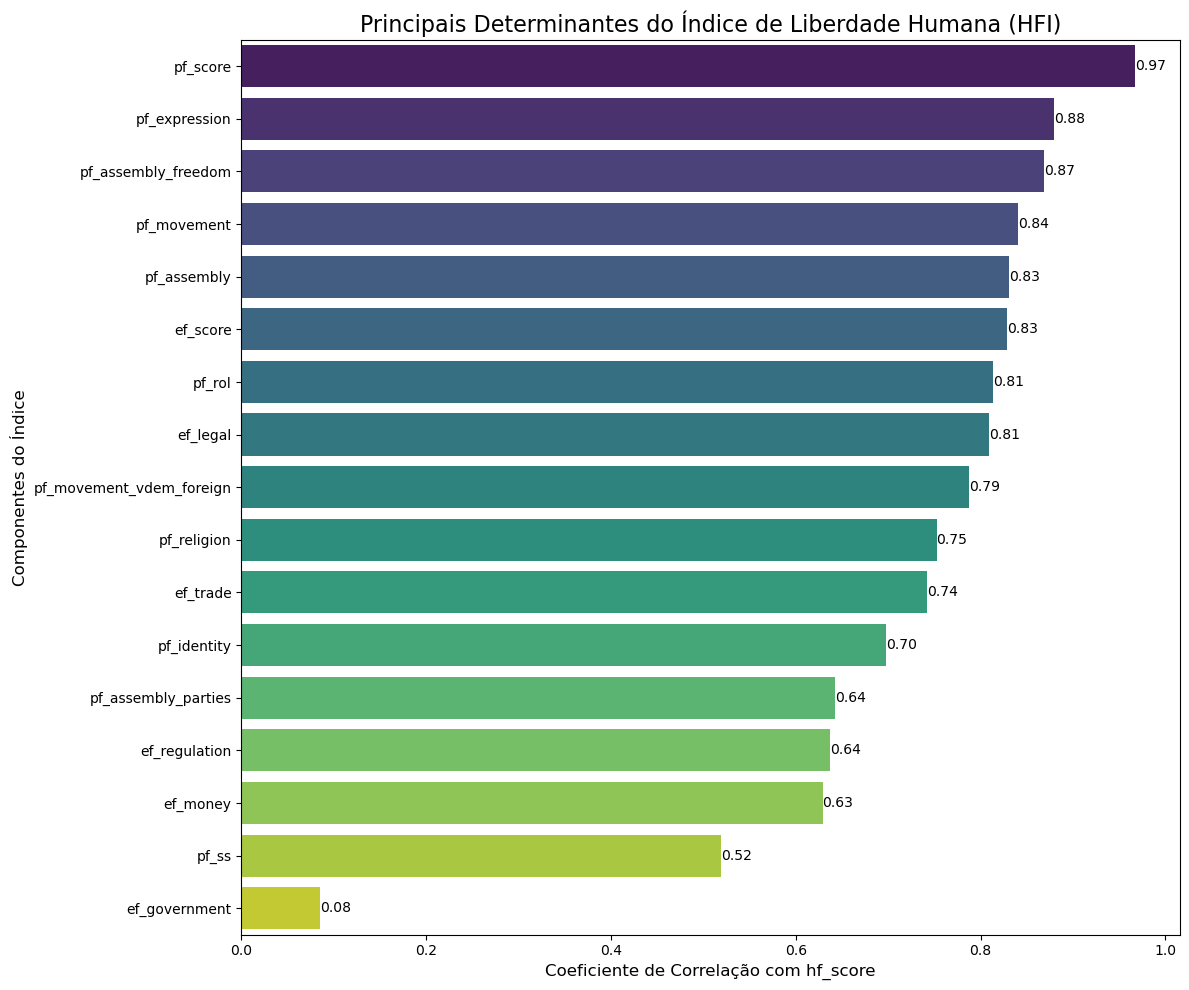

In [50]:
determinant_columns = [
    "hf_score",

    # Main Dimensions
    "pf_score",
    "ef_score",

    # Personal Freedom Components
    "pf_rol",
    "pf_ss",
    "pf_movement",
    "pf_religion",
    "pf_assembly",
    "pf_expression",
    "pf_identity",
    "pf_assembly_freedom",
    "pf_assembly_parties",
    "pf_movement_vdem_foreign",

    # Economic Freedom Components
    "ef_government",
    "ef_legal",
    "ef_money",
    "ef_trade",
    "ef_regulation",
]

df_determinants = df[determinant_columns].copy()

for col in df_determinants.columns:
        df_determinants[col] = pd.to_numeric(df_determinants[col], errors='coerce')

correlation_matrix = df_determinants.corr()
hfi_correlations = correlation_matrix["hf_score"].sort_values(ascending=False)
hfi_correlations = hfi_correlations.drop("hf_score")

print("Correlação de cada componente com o Índice de Liberdade Humana (hf_score):")
print(hfi_correlations)

plt.figure(figsize=(12, 10))
sns.barplot(x=hfi_correlations.values, y=hfi_correlations.index,
           hue=hfi_correlations.index, palette='viridis', legend=False)
plt.title('Principais Determinantes do Índice de Liberdade Humana (HFI)', fontsize=16)
plt.xlabel('Coeficiente de Correlação com hf_score', fontsize=12)
plt.ylabel('Componentes do Índice', fontsize=12)

for index, value in enumerate(hfi_correlations):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left' if value > 0 else 'right')

plt.tight_layout()
plt.savefig('./data/hfi_determinants_correlation.png')


2 - Como suas dimensões (pessoal e econômica) se correlacionam com o desenvolvimento
